In [1]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [3]:
!mkdir -p ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d reevald/geometric-shapes-mathematics

 83% 97.0M/117M [00:02<00:00, 77.6MB/s]
100% 117M/117M [00:02<00:00, 53.3MB/s] 


In [ ]:
! unzip geometric-shapes-mathematics.zip

# **Import necessary libraries**

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import pandas as pd
import os
import tensorflow as tf
from glob import glob
from tqdm import tqdm
from PIL import Image

# **Preprocessing**

Read lables

In [8]:
labels = os.listdir("/content/dataset/train")
labels

['rectangle',
 'kite',
 'rhombus',
 'parallelogram',
 'square',
 'circle',
 'triangle',
 'trapezoid']

For simplicity will use 3 labels (rectangle, triangle, circle)

Show Sample images

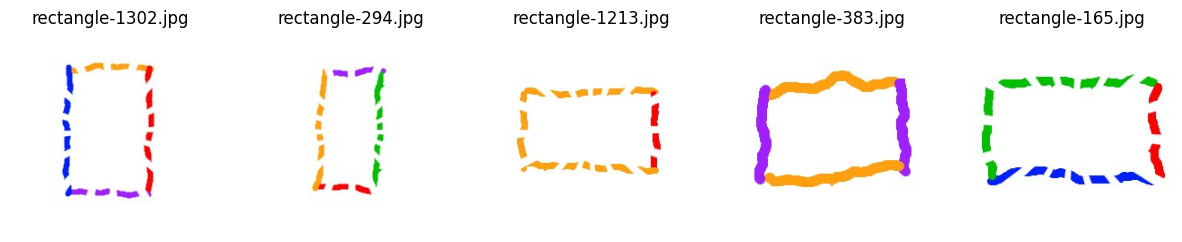

In [9]:
def plot_sample_images(folder_path, num_images):
    # Get a list of file names in the folder
    file_names = os.listdir(folder_path)

    # Ensure the number of images to plot is not greater than the number of files
    num_images = min(num_images, len(file_names))

    # Plot the sample images
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    for i in range(num_images):
        image_path = os.path.join(folder_path, file_names[i])
        image = Image.open(image_path)
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(file_names[i])
    plt.show()

# Example usage:
train_folder = "/content/dataset/train/rectangle"
num_sample_images = 5
plot_sample_images(train_folder, num_sample_images)

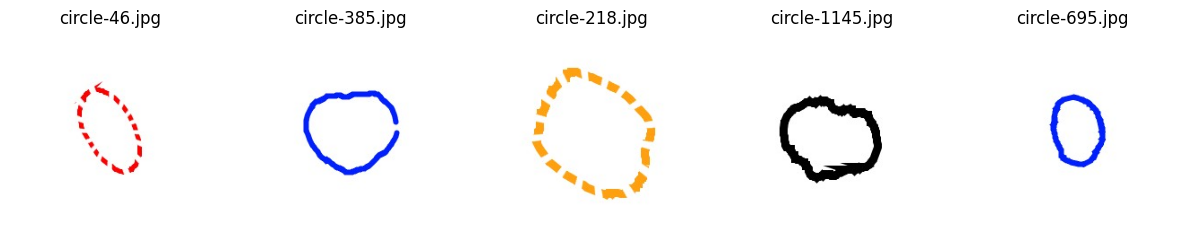

In [10]:
def plot_sample_images(folder_path, num_images):
    # Get a list of file names in the folder
    file_names = os.listdir(folder_path)

    # Ensure the number of images to plot is not greater than the number of files
    num_images = min(num_images, len(file_names))

    # Plot the sample images
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    for i in range(num_images):
        image_path = os.path.join(folder_path, file_names[i])
        image = Image.open(image_path)
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(file_names[i])
    plt.show()

# Example usage:
train_folder = "/content/dataset/train/circle"
num_sample_images = 5
plot_sample_images(train_folder, num_sample_images)

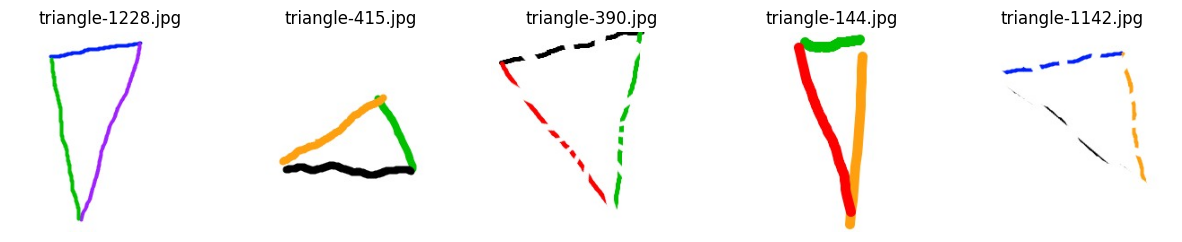

In [11]:
def plot_sample_images(folder_path, num_images):
    # Get a list of file names in the folder
    file_names = os.listdir(folder_path)

    # Ensure the number of images to plot is not greater than the number of files
    num_images = min(num_images, len(file_names))

    # Plot the sample images
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    for i in range(num_images):
        image_path = os.path.join(folder_path, file_names[i])
        image = Image.open(image_path)
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(file_names[i])
    plt.show()

# Example usage:
train_folder = "/content/dataset/train/triangle"
num_sample_images = 5
plot_sample_images(train_folder, num_sample_images)

Read data

In [13]:
X_train = []
Y_train = []

for i in tqdm(glob('/content/dataset/train/circle/*')):
    img = Image.open(i).convert('L')  # Convert to grayscale
    temp = np.array(img.resize((28,28)))
    X_train.append(temp)
    Y_train.append(0)

for i in tqdm(glob('/content/dataset/train/triangle/*')):
    img = Image.open(i).convert('L')  # Convert to grayscale
    temp = np.array(img.resize((28,28)))
    X_train.append(temp)
    Y_train.append(1)

for i in tqdm(glob('/content/dataset/train/rectangle/*')):
    img = Image.open(i).convert('L')  # Convert to grayscale
    temp = np.array(img.resize((28,28)))
    X_train.append(temp)
    Y_train.append(2)

100%|██████████| 1500/1500 [00:01<00:00, 888.65it/s] 


change text to lables ( circle: 0 , triangle: 1, rectangle: 2)

In [14]:
X_test = []
Y_test = []

for i in tqdm(glob('/content/dataset/test/circle/*')):
    img = Image.open(i).convert('L')  # Convert to grayscale
    temp = np.array(img.resize((28,28)))
    X_test.append(temp)
    Y_test.append(0)

for i in tqdm(glob('/content/dataset/test/rectangle/*')):
    img = Image.open(i).convert('L')  # Convert to grayscale
    temp = np.array(img.resize((28,28)))
    X_test.append(temp)
    Y_test.append(2)

for i in tqdm(glob('/content/dataset/test/triangle/*')):
    img = Image.open(i).convert('L')  # Convert to grayscale
    temp = np.array(img.resize((28,28)))
    X_test.append(temp)
    Y_test.append(1)

100%|██████████| 500/500 [00:00<00:00, 1204.37it/s]


Normalization

In [15]:
X_train = np.array(X_train)
X_train = X_train/255.0
Y_train = np.array(Y_train)
X_test = np.array(X_test)
X_test = X_test/255.0
Y_test = np.array(Y_test)

In [16]:
X_train.shape, X_test.shape

((4500, 28, 28), (1500, 28, 28))

Reshape to fit for KNN algorithm

In [17]:
# Reshape training and testing data arrays
x_train = X_train.reshape(X_train.shape[0], -1)
x_test = X_test.reshape(X_test.shape[0], -1)

In [18]:
x_train.shape, x_test.shape, Y_train.shape, Y_test.shape

((4500, 784), (1500, 784), (4500,), (1500,))

# **Train the model**

In [19]:
# Define a range of k values to try
k_values = range(1, 11)  # Trying k values from 1 to 10

In [20]:
# Train KNN models with different k values and calculate errors
errors = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, Y_train)
    y_pred = knn.predict(x_test)
    error = np.mean(y_pred != Y_test)
    errors.append(error)

plot error and get lowest error k

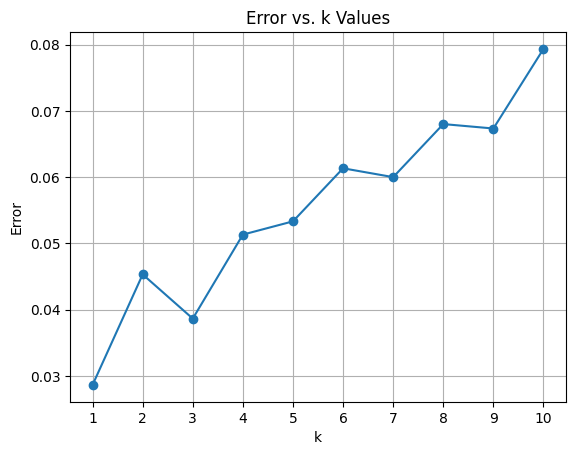

In [21]:
# Plot errors for different k values
plt.plot(k_values, errors, marker='o')
plt.xlabel('k')
plt.ylabel('Error')
plt.title('Error vs. k Values')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [22]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, Y_train)
y_pred = knn.predict(x_test)

print("Accuracy: ", accuracy_score(y_pred, Y_test))

Accuracy:  0.9713333333333334


In [23]:
# Find the minimum error and its corresponding k value
min_error = min(errors)
best_k = k_values[errors.index(min_error)]

print(f"Minimum error: {min_error:.4f} (for k = {best_k})")

Minimum error: 0.0287 (for k = 1)


Trying a different dataset

In [24]:
import torch
from torchvision.datasets import FashionMNIST
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the Fashion-MNIST dataset
train_dataset = FashionMNIST(root='./data', train=True, download=True)
test_dataset = FashionMNIST(root='./data', train=False, download=True)

# Extract features and labels from the dataset
X_train = train_dataset.data.numpy().reshape(-1, 28*28)  # Flatten images
y_train = train_dataset.targets.numpy()
X_test = test_dataset.data.numpy().reshape(-1, 28*28)  # Flatten images
y_test = test_dataset.targets.numpy()

# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Standardize the features (optional but recommended for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

100%|██████████| 26421880/26421880 [00:01<00:00, 14022451.45it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 276521.06it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 4995405.29it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 12814407.71it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [34]:
# Train KNN models with different k values and calculate errors
errors = []
k_values = range(1, 21)  # Trying k values from 1 to 20
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error = np.mean(y_pred != y_test)
    errors.append(error)

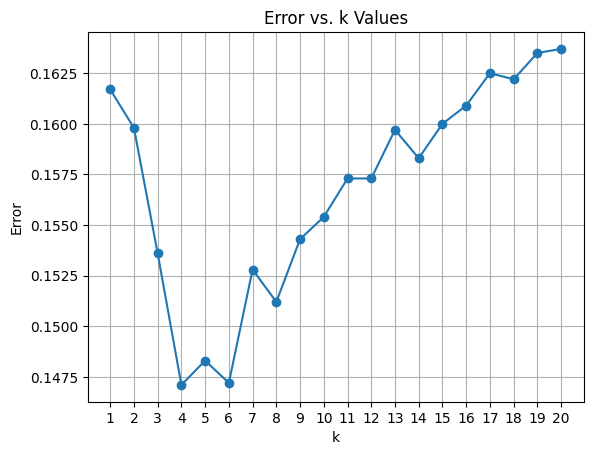

In [35]:
# Plot errors for different k values
plt.plot(k_values, errors, marker='o')
plt.xlabel('k')
plt.ylabel('Error')
plt.title('Error vs. k Values')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [36]:
# Find the minimum error and its corresponding k value
min_error = min(errors)
best_k = k_values[errors.index(min_error)]

print(f"Minimum error: {min_error:.4f} (for k = {best_k})")

Minimum error: 0.1471 (for k = 4)


# **Try pca to see difference**

In [37]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.5)  # Adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [38]:
errors_pca = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_pca, y_train)
    y_pred = knn.predict(X_test_pca)
    error = 1 - accuracy_score(y_test, y_pred)
    errors_pca.append(error)

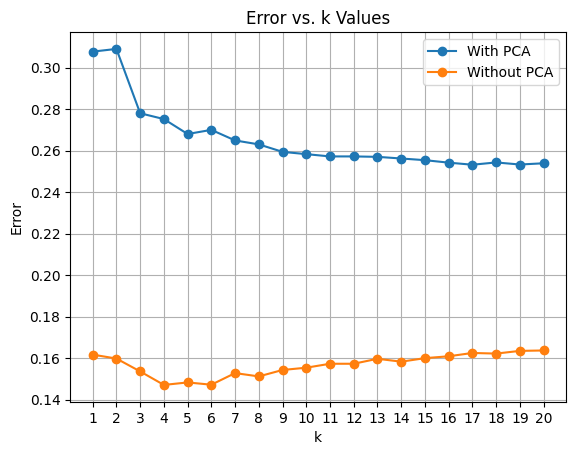

In [39]:
# Plot errors for different k values with PCA
plt.plot(k_values, errors_pca, marker='o', label='With PCA')

# Plot errors for different k values without PCA (for comparison)
plt.plot(k_values, errors, marker='o', label='Without PCA')

plt.xlabel('k')
plt.ylabel('Error')
plt.title('Error vs. k Values')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

In [42]:
# Find the minimum error and its corresponding k value
min_error = min(errors_pca)
best_k = k_values[errors_pca.index(min_error)]

print(f"Minimum error: {min_error:.4f} (for k = {best_k})")

Minimum error: 0.2532 (for k = 17)


In [54]:
# Create a KNeighborsClassifier instance with No specific algorithm
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train_pca, y_train)
y_pred1 = knn.predict(X_test_pca)
accuracy1=accuracy_score(y_pred1, y_test)
print("Accuracy1 is: ", accuracy1)

# Create a KNeighborsClassifier instance with a specific algorithm
# For example, let's use 'ball_tree' algorithm
knn = KNeighborsClassifier(n_neighbors=17, algorithm='ball_tree')
knn.fit(X_train_pca, y_train)
y_pred2 = knn.predict(X_test_pca)
accuracy2=accuracy_score(y_pred2, y_test)
print("Accuracy2 is: ", accuracy2)

# For example, let's use 'kd_tree' algorithm
knn = KNeighborsClassifier(n_neighbors=17, algorithm='kd_tree')
knn.fit(X_train_pca, y_train)
y_pred2 = knn.predict(X_test_pca)
accuracy2=accuracy_score(y_pred2, y_test)
print("Accuracy3 is: ", accuracy2)

Accuracy1 is:  0.7468
Accuracy2 is:  0.7468
Accuracy3 is:  0.7468


# **KNN from scratch**

In [43]:
# Define the KNN classifier
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [np.sqrt(np.sum((x - x_train)**2)) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        k_indices = np.argsort(distances)[:self.k]
        # Extract the labels of the k nearest neighbor training samples
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Return the most common class label
        most_common = max(set(k_nearest_labels), key=k_nearest_labels.count)
        return most_common